In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics

In [5]:
dataset_path = '/content/drive/MyDrive/datasets/5Animals'

# image augmentation
idg = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

dataset_train = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset='training',
    target_size=(224, 224)
)

dataset_validation = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset='validation',
    target_size=(224, 224)

)

Found 1042 images belonging to 5 classes.
Found 257 images belonging to 5 classes.


In [7]:
width = height = 224

In [8]:
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(width, height, 3),
    pooling='avg'
)

9406464/9406464 [==============================] - 0s 0us/step


In [9]:
for layer in base_model.layers[0:-4]:
  layer.trainable = False

In [14]:
model = models.Sequential([
    base_model,
    layers.Dropout(0.2),
    layers.Dense(5, activation='softmax')
])

In [15]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

In [16]:
history = model.fit(dataset_train,
                    validation_data=dataset_validation,
                    epochs=32)

Epoch 1/32
33/33 [==============================] - 425s 13s/step - loss: 0.7206 - accuracy: 0.7610 - val_loss: 0.2511 - val_accuracy: 0.9455
Epoch 2/32
33/33 [==============================] - 32s 996ms/step - loss: 0.2304 - accuracy: 0.9386 - val_loss: 0.1361 - val_accuracy: 0.9689
Epoch 3/32
33/33 [==============================] - 37s 1s/step - loss: 0.1436 - accuracy: 0.9616 - val_loss: 0.1022 - val_accuracy: 0.9805
Epoch 4/32
33/33 [==============================] - 38s 1s/step - loss: 0.1038 - accuracy: 0.9731 - val_loss: 0.0806 - val_accuracy: 0.9805
Epoch 5/32
33/33 [==============================] - 32s 962ms/step - loss: 0.0814 - accuracy: 0.9760 - val_loss: 0.0619 - val_accuracy: 0.9883
Epoch 6/32
33/33 [==============================] - 32s 991ms/step - loss: 0.0708 - accuracy: 0.9741 - val_loss: 0.0653 - val_accuracy: 0.9883
Epoch 7/32
33/33 [==============================] - 34s 1s/step - loss: 0.0510 - accuracy: 0.9875 - val_loss: 0.0492 - val_accuracy: 0.9922
Epoch 8/3

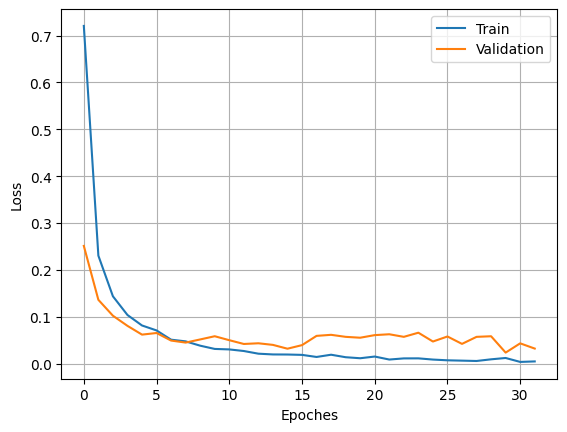

In [17]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

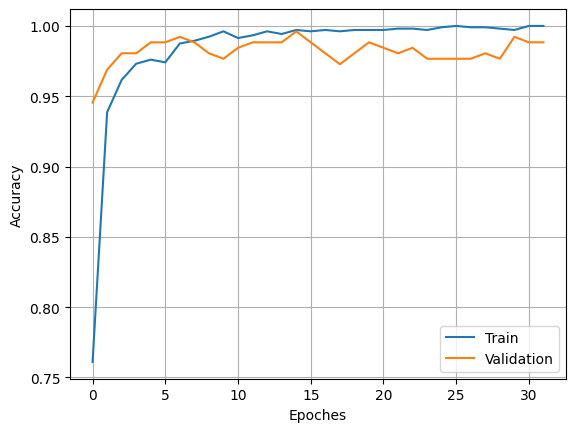

In [18]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [19]:
model.save('/content/drive/MyDrive/PyLearn 7 Course/54.TransferLearning/5animal_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
Y_pred = []
Y_vall = []

for i in range(9):
  for label in model.predict(dataset_validation[i][0]):
    Y_pred.append(np.argmax(label))
  for label in dataset_validation[i][1]:
    Y_vall.append(np.argmax(label))

Y_pred = np.array(Y_pred)
Y_vall = np.array(Y_vall)

1/1 [==============================] - 1s 755ms/step


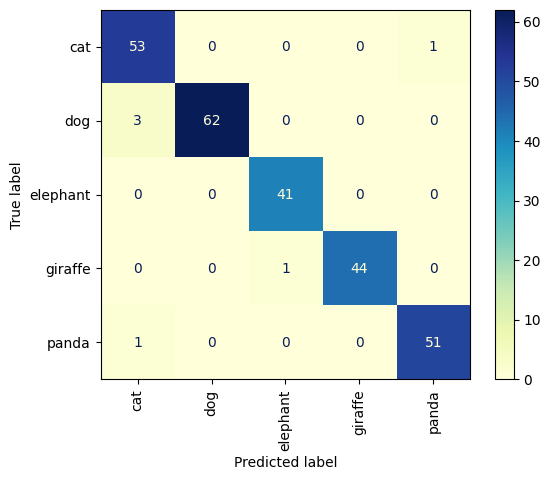

In [21]:
confusion_matrix = metrics.confusion_matrix(Y_pred, Y_vall)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=dataset_validation.class_indices)

cm_display.plot(cmap='YlGnBu', xticks_rotation=90)
plt.show()